# **Manejo de datos faltantes**


### Indice de temas
1. [Datos ruidosos](#1.-Datos-ruidosos)
    * 1.1.[Tipos de datos ruidosos](#1.1-Tipos-de-datos-ruidosos)
    * 1.2 [Datos Erróneos](#1.2-Datos-Erróneos)   
    * 1.3 [Datos faltantes](#1.2-Datos-faltantes)
    * 1.4 [Dataset: Primer mirada los datos](#1.3-Dataset:-Primer-mirada-a-los-datos)
    * 1.4.1 [Exploración](#1.4.1-Exploración)
    * 1.5 [Reconocimiento de datos ruidosos](#1.5-Reconocimiento-de-datos-ruidosos)
       * 1.5.1 [Detección las variables con valor cero del dataset](#1.5.1-Detección-las-variables-con-valor-cero-del-dataset)
       * 1.5.2 [Exploracion de las variables Bedroom2, Bathroom y Distance](#1.5.2-Exploracion-de-las-variables-Bedroom2,-Bathroom-y-Distance)
       * 1.5.3 [Ejercicio](#1.5.3-Ejercicio)
    * 1.6 [Reconocimiento de datos faltantes](#1.6-Reconocimiento-de-datos-faltantes)    
    * 1.7 [Librería Missingno](#1.7-Librería-Missingno)
    * 1.8 [Razones que contribuyen a tener datos faltantes](#1.8-Razones-que-contribuyen-a-tener-datos-faltantes)
    * 1.9 [Detección de correlaciones](#1.9-Detección-de-correlaciones)
       * 1.9.1 [Detección de correlaciones usando matrix plot](#1.9.1-Detección-de-correlaciones-usando-matrix-plot)
       * 1.9.2 [Detección de correlaciones usando Heatmap](#1.9.2-Detección-de-correlaciones-usando-Heatmap)
2. [Tratamiento del valor faltante](#2.-Tratamiento-del-valor-faltante)
    * 2.1.[Eliminacion de datos faltantes](#2.1-Eliminacion-de-datos-faltantes)
        * 2.1.1[Eliminación de casos completos](#2.1.1-Eliminación-de-casos-completos)
        * 2.1.2[Eliminación de variables](#2.1.2-Eliminación-de-variables)
    * 2.2 [Técnicas de imputación](#2.2-Técnicas-de-imputación)
        * 2.2.1 [Técnicas Básicas](#2.2.1-Técnicas-básica)
        * 2.2.2 [Imputar con el valor mas frecuente](#2.2.2-Imputar-con-el-valor-mas-frecuente)
        * 2.2.3 [Ejercicio](#2.2.3-Ejercicio)
    * 2.3 [Técnicas de imputacion avanzadas](#2.3-Técnicas-de-imputacion-avanzadas)
        * 2.3.1 [K-Nearest Neighbor Imputation](#2.3.1-K-Nearest-Neighbor-Imputation)
        * 2.3.2 [Multivariate feature imputation](#2.3.2-Multivariate-feature-imputation)
        * 2.3.3 [Ejercicio](#2.3.3-Ejercicio)
        * 2.3.4 [Otros métodos de imputación](#2.3.4-Otros-métodos-de-imputación)




## 1. Datos ruidosos

Una de las conclusiones más importantes de trabajar con información es que los datos nunca se organizan, ni se recolectan de forma simple. Los datos del mundo real, al combinar diferentes características y calificaciones de objetos y sujetos muchas veces contienen errores,  lo que requiere una limpieza significativa (y, a menudo, experiencia de dominio) para ser utilizables. Esto es lo que se refiere con ruido en los datos.

Casi todos los conjuntos de datos contienen algo de ruido, y cuanto menos ruido haya, mejor ("más limpio") será el conjunto de datos. Algunos tipos de ruido son más fáciles de corregir que otros. A veces, eliminar el ruido por completo es simplemente imposible y todo lo que puede hacer es volver a muestrear o esperar lo mejor, teniendo en cuenta que en procesamiento de datos, <span style="color:FireBrick">**cuando entra basura, sale basura.**</span>

### 1.1 Tipos de datos ruidosos

* El <span style="color:FireBrick">**dato erróneo**</span>  es un dato recolectado con algun error, que lo separa de la generalidad. Debe ser inspeccionado y tratado especialmente para determinar si es un <span style="color:FireBrick">**ruido**</span> o un dato importante con baja probabilidad de ocurrir, es decir un  <span style="color:FireBrick">**dato atípico**</span> o <span style="color:FireBrick">**outlier**</span>.

* El <span style="color:FireBrick">**dato faltante**</span> es el un dato que no esta registrado en la database. Dependiendo como se hayan recolectado los datos y escrito el archivo de datos, pueden estar marcados con un <span style="color:FireBrick">**NaN**</span>, o con un número fuera de rango, como <span style="color:FireBrick">**0**</span> o <span style="color:FireBrick">**-1**</span>. Es muy importante reconocer la codificación de datos faltantes, para no confundirlos con un dato válido recolectado.



### 1.2 Datos Erróneos

Los datos erróneos se dividen en <span style="color:FireBrick">**datos atípicos**</span> y <span style="color:FireBrick">**datos mal codificados**</span>.

Los <span style="color:FireBrick">**datos atípicos**</span> son datos reales, sin embargo, pueden producir demasiada palanca sobre los estadisticos de tendencia central y desviacion, lo cual los hace candidatos a ser retirados del dataset.

Los <span style="color:FireBrick">**datos mal codificados**</span> son la fuente de error mas comun, que en muchos casos no puede ser detectada. Es importante detectar cuando los datos faltantes fueron codificados como valores fuera de rango, por ejemplo el valor <span style="color:FireBrick">**cero**</span>. Este error suele aparecer cuando se mezclan databases con distinta codificacion de datos faltantes



### 1.3 Datos Faltantes

Los datos faltantes se dividen en <span style="color:FireBrick">**datos perdidos**</span> y <span style="color:FireBrick">**datos inexistentes**</span>.

* Un <span style="color:FireBrick">**dato perdido**</span> es un dato que uno sabe que existe pero dada una recolección fallida o incompleta, no se conoce su valor.

* Un  <span style="color:FireBrick">**dato inexistente**</span> es un dato faltante, por lo cual es ruido, pero a la vez, no lo es, pues no existe. Esto es, no puede ser recolectado.

Python no reconoce la diferencia, por lo cual uno debe ser muy cauteloso cuando trabaja con datos de ambas clases. Al leer un archivo con espacios en blanco, automáticamente asigna a ese dato un <span style="color:FireBrick">**NaN**</span> numérico con capacidad de ser imputado.



Sin embargo,  en Python existe el objeto <span style="color:FireBrick">**None**</span>, el cual es un single null datatype. El dato <span style="color:FireBrick">**NaN**</span> puede ser usado como valor numérico en operaciones matematicas, mientras que <span style="color:FireBrick">**None**</span> no, o al menos no debería.

* <span style="color:FireBrick">**NaN**</span> es un valor numérico, definido en IEEE 754 floating-point standard.

* <span style="color:FireBrick">**None**</span> es un internal Python type (NoneType) y es mas parecido al ''no existente'' o "vacio" que al  "numerically invalid" en este contexto.

Porque no puede usarse <span style="color:FireBrick">**None**</span> como el dato nulo de R? porque Numpy y Pandas no propagan estos datos a traves de operaciones aritméticas, y para evitar usarlo en un algoritmo hay que testear cada dato para ver si es None.


In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s

0    NaN
1   2.00
2   3.00
dtype: float64

In [ ]:
s = pd.Series(["a", "b", "c"])
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

### 1.3 Dataset: Primer mirada a los datos

Este es el punto en el que entramos en la parte de la ciencia de datos que necesita mucho de la "intuición de datos", que consiste en "mirar realmente sus datos y tratar de averiguar por qué son así y cómo esto afecta el análisis ".

Puede ser una parte frustrante de la ciencia de datos, especialmente si se es nuevo en el campo y no se tiene mucha experiencia.

<span style="color:FireBrick">**Para lidiar con los valores erróneos**</span>, hay que estudiar las distribuciones de las variables y detectar los valores atípicos, teniendo en cuenta la forma de recolección de los datos. Un dato atípico puede ser un valor posible de una variable con cola pesada, o puede ser un error al recolectar los datos. Hay valores atípicos que enmascaran valores faltantes.

<span style="color:FireBrick">**Para lidiar con los valores perdidos**</span>, es necesario usar la intuición para averiguar por qué falta el valor. Una de las preguntas más importantes que puede hacerse para ayudar a resolver esto es la siguiente:

- <span style="color:FireBrick">**¿Falta este valor porque no se registró o porque no existe?**</span>

Por ejemplo

- Una casa de 2 dormitorios no incluiría una respuesta para el tamaño del tercer dormitorio.


- Alguien que está siendo encuestado puede optar por no compartir sus ingresos.

Si falta un valor porque <span style="color:FireBrick">**no existe**</span> (como la altura del hijo mayor de alguien que no tiene hijos), no tiene sentido intentar adivinar cuál podría ser. Estos valores que probablemente desee mantener como NaN, o codificados por un valor constante muy lejos del rango real de la variable.

Por otro lado, si falta un valor <span style="color:FireBrick">**porque no se registró**</span>, puede intentar adivinar cuál podría haber sido es valor basándose en los otros valores en esa columna y fila.

En estadística, <span style="color:FireBrick">**predecir**</span> es otorgar valor a un dato que todavia no ha sido muestreado, e <span style="color:FireBrick">**imputar**</span> es estimar un valor que puede haber sido muestreado pero no se lo conoce.



### 1.4 Exploración

Lo primero que hago cuando obtengo un nuevo conjunto de datos es echar un vistazo a algunos de ellos. Esto me permite ver si el dataset se ha leído correctamente, y tener una idea de lo que está sucediendo con los datos. En este caso, estoy buscando para ver si veo algún valor faltante, que se representará con <span style="color:FireBrick">**NaN**</span> o <span style="color:FireBrick">**None**</span>. pero tambien tengo que observar si hay números fuera de rango, como <span style="color:FireBrick">**0**</span> o números negativos que no corresponden al rango de la variable.

Vamos a trabajar con el dataset <span style="color:FireBrick">**Melbourne Housing Snapshot**</span>, es un conjunto reducido de información sobre ventas de propiedades, con el objeto de observar tendencias en las ventas, y predecir precios.


Carguemos las librerias necesarias para trabajar

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import plotly.express as px
import numpy
import pandas

Carguemos los datos

In [ ]:
melb_data = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_data.shape


(13580, 21)

In [ ]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


Estudiemos la definición de las variables que vamos a tener desplegadas en columnas. Recordemos que los casos son las filas.

 Variables

- Suburb: region

- Address: property address

- Rooms: Number of rooms

- Price: Price in dollars

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size

- BuildingArea: Building Size

- CouncilArea: Governing council for the area

In [ ]:
y=melb_data.sample(10,random_state=123)
print(y)

              Suburb              Address  Rooms Type      Price Method  \
5799        St Kilda  25/69 Wellington St      2    u  542500.00     PI   
10596   Broadmeadows          48 Walsh St      3    h  386000.00      S   
7471      Ascot Vale         17 Monash St      3    h 1230000.00     PI   
2308          Elwood    2/129 Brighton Rd      2    u  684000.00     SP   
2602   Fitzroy North        264 Barkly St      3    h 1600000.00      S   
3159        Hawthorn           16 Pine St      3    h 1712000.00      S   
5781        St Kilda   1/62 Wellington St      1    u  500000.00     SP   
2443        Essendon      1/19 Cameron Rd      2    u  691000.00     SP   
6005        Sunshine        165 Morris St      3    h  591500.00      S   
6365          Toorak    4/264 Williams Rd      2    u  810000.00     SP   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
5799         McGrath  10/09/2016      6.10   3182.00  ...      1.00 1.00   
10596  hockingstuart  

### 1.5 Reconocimiento de datos ruidosos

Parece que hay variables con valores faltantes, que han sido reconocidos por pandas como <span style="color:FireBrick">**NaN**</span>, y valores <span style="color:FireBrick">**0**</span> que podrían ser tambien datos faltantes.

En esta muestra vemos las variables <span style="color:FireBrick">**Landsize,  BuildingArea,  YearBuilt**</span>.
con problemas potenciales

- Landsize tiene valores <span style="color:FireBrick">**0**</span>.

- BuildingArea y  YearBuilt tienen <span style="color:FireBrick">**NaN**</span>

Son estas las únicas variables con problemas? como puedo encontrar TODAS las variables que tengo que estudiar?

### 1.5.1 Detección  las variables con valor cero del dataset

In [ ]:
##Hago el conteo de columnas cuya fila sea igual a cero
cols = melb_data[melb_data == 0].count(axis=0)
##Reviso cuántas columnas tienen filas con valores en cero
cols[cols > 0]


Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

Recordemos que tenemos 13580 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.

Vamos a trabajar las variables Bedroom2,  Bathroom y Distance y vamos a dejar las otras como ejercicio.

### 1.5.2 Exploracion de las variables Bedroom2,  Bathroom y Distance

### Estudiemos los tipos de propiedades SIN DORMITORIOS

<Axes: xlabel='Bedroom2', ylabel='Type'>

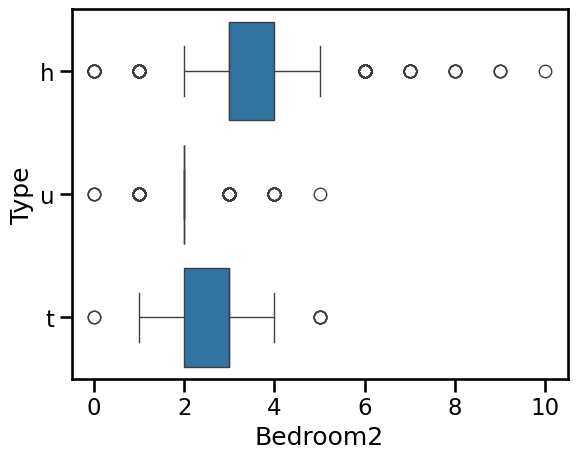

In [ ]:
sns.boxplot(data=melb_data[melb_data.Bedroom2<20], x='Bedroom2', y='Type')

Recordemos que solo había 16 casos con valores cero. Y hay unit, houses y townhouses sin dormitorios. Se puede pensar que hay unidades de estilo de moderno monoambiente, donde conviven la cocina y el dormitorio. Es dificil pensar que hay casa sin dormitorios. Ese parece ser un dato faltante, pues Bedroom2 es un dato obtenido mediante la union con otra database.

Miremos en forma conjunta la variable Rooms y la variable Bedroom2.

In [ ]:
Bedroom2 = melb_data.Bedroom2
Rooms = melb_data.Rooms
pd.crosstab(Bedroom2,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.00,0,5,8,3,0,0,0,0,0
1.00,663,21,5,2,0,0,0,0,0
2.00,16,3539,162,19,1,0,0,0,0
3.00,2,74,5626,175,18,1,0,0,0
4.00,0,8,73,2473,42,4,0,1,0
5.00,0,1,5,15,531,2,2,0,0
6.00,0,0,0,0,2,59,0,2,0
7.00,0,0,0,0,1,1,8,0,0
8.00,0,0,0,0,1,0,0,4,0


Lamentablemente, la variable Rooms es mucho mas informativa que la variable Bedroom2.

### Ejemplo de accion: eliminar la variable Bedroom2.

NUNCA ACCIONAR SOBRE EL DATASET ORIGINAL!!!!

In [ ]:
melb_df=melb_data.copy()
melb_df=melb_df.drop(['Bedroom2'], axis=1)
melb_df.sample(10,random_state=123)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5799,St Kilda,25/69 Wellington St,2,u,542500.00,PI,McGrath,10/09/2016,6.10,3182.00,1.00,1.00,0.00,NaN,NaN,Port Phillip,-37.86,144.99,Southern Metropolitan,13240.00
10596,Broadmeadows,48 Walsh St,3,h,386000.00,S,hockingstuart,8/07/2017,14.00,3047.00,1.00,1.00,341.00,71.00,1965.00,Hume,-37.69,144.92,Northern Metropolitan,4294.00
7471,Ascot Vale,17 Monash St,3,h,1230000.00,PI,Nelson,20/05/2017,5.90,3032.00,1.00,2.00,538.00,NaN,NaN,Moonee Valley,-37.78,144.91,Western Metropolitan,6567.00
2308,Elwood,2/129 Brighton Rd,2,u,684000.00,SP,McGrath,19/11/2016,7.70,3184.00,1.00,0.00,0.00,98.00,1930.00,Port Phillip,-37.88,144.99,Southern Metropolitan,8989.00
2602,Fitzroy North,264 Barkly St,3,h,1600000.00,S,Collins,25/02/2017,3.50,3068.00,1.00,0.00,370.00,NaN,NaN,Yarra,-37.78,144.99,Northern Metropolitan,6244.00
3159,Hawthorn,16 Pine St,3,h,1712000.00,S,Marshall,12/11/2016,4.60,3122.00,1.00,1.00,342.00,130.00,1900.00,Boroondara,-37.81,145.02,Southern Metropolitan,11308.00
5781,St Kilda,1/62 Wellington St,1,u,500000.00,SP,Biggin,4/03/2017,6.10,3182.00,1.00,1.00,2335.00,58.00,2002.00,Port Phillip,-37.86,144.99,Southern Metropolitan,13240.00
2443,Essendon,1/19 Cameron Rd,2,u,691000.00,SP,Brad,25/02/2017,8.00,3040.00,1.00,1.00,201.00,80.00,1995.00,Moonee Valley,-37.75,144.93,Western Metropolitan,9264.00
6005,Sunshine,165 Morris St,3,h,591500.00,S,Barry,30/07/2016,12.60,3020.00,1.00,2.00,427.00,NaN,NaN,Brimbank,-37.79,144.83,Western Metropolitan,3755.00
6365,Toorak,4/264 Williams Rd,2,u,810000.00,SP,Jellis,10/12/2016,4.60,3142.00,2.00,2.00,0.00,94.00,1980.00,Stonnington,-37.84,145.00,Southern Metropolitan,7217.00


### Estudiemos los tipos de propiedades SIN BAÑOS

<Axes: xlabel='Bathroom', ylabel='Type'>

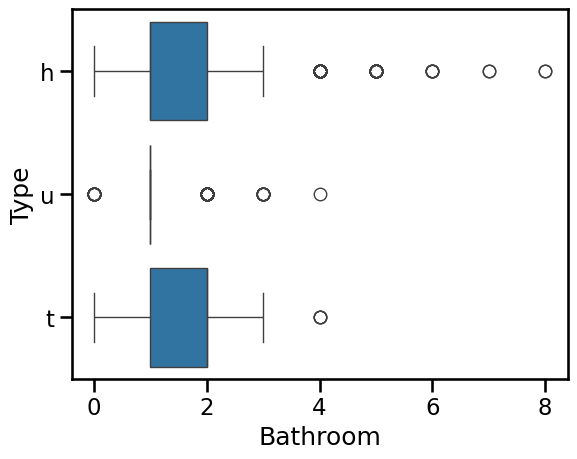

In [ ]:
sns.boxplot(data=melb_data, x='Bathroom', y='Type')

In [ ]:
Bathroom = melb_data.Bathroom
pd.crosstab(Bathroom,Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bathroom,,,,,,,,,
0.00,1,19,11,3,0,0,0,0,0
1.00,674,3117,3250,452,17,2,0,0,0
2.00,6,504,2459,1720,260,20,3,2,0
3.00,0,8,153,469,244,35,5,2,1
4.00,0,0,5,41,47,9,2,2,0
5.00,0,0,1,2,25,0,0,0,0
6.00,0,0,2,0,2,1,0,0,0
7.00,0,0,0,0,1,0,0,1,0
8.00,0,0,0,1,0,0,0,1,0


### Ejemplo de accion: considerar que las propiedades que no listan baños suponen que existe al menos uno.

In [ ]:
import numpy as np
melb_df.loc[melb_df.Bathroom<1,'Bathroom']=1


cols2 = melb_df[melb_df == 0].count(axis=0)#/len(melb_df.index)
cols2[cols2 > 0]

Distance           6
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

In [ ]:
cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

como podemos observar, en mi dataset editado, no está la variable bedrooms y la categoria baños no tiene ceros.

In [ ]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


In [ ]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,1.54,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,1.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


### <span style="color:FireBrick">**1.5.3 Ejercicio: Dada las columnas del dataset que tienen ceros,  decidir si son ceros válidos o son datos erróneos o datos faltantes enmascarados. Decidir acciones**</span>

In [ ]:
cols = melb_data[melb_data == 0].count(axis=0)
cols[cols > 0]


Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

 ### 1.6 Reconocimiento de datos faltantes

- La falta de datos puede limitar nuestra capacidad para realizar tareas importantes de ciencia de datos, como convertir tipos de datos o visualizar datos.

- Los datos faltantes pueden reducir el poder estadístico de nuestros modelos, lo que a su vez aumenta la probabilidad de error de tipo II. El error de tipo II es la imposibilidad de rechazar una hipótesis nula falsa.

- Los datos faltantes pueden reducir la representatividad de las muestras en el conjunto de datos.

- La falta de datos completos puede distorsionar la validez de los ensayos científicos y puede llevar a conclusiones inválidas.


Las bibliotecas de Python representan los números faltantes como <span style="color:FireBrick">**NaN**</span>, que es la abreviatura de "no es un número". Vamos a detectar qué celdas tienen valores perdidos y luego contar cuántos hay en cada columna con el comando: df.isna() y el df.info()



In [ ]:
melb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
missing_values_count = melb_data.isna().sum()
missing_values_count

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

El dataset donde empezamos a corregir ...

In [ ]:
melb_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Hay bastantes, pero concentrados en tres variables. Veamos cual es el porcentaje de datos faltantes que tiene el dataset.

In [ ]:
# how many total missing values do we have?
total_cells = np.product(melb_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

4.648292306613367

Solo hay un 4% de datos faltantes, concentrados en algunas variables. Usando el paquete `missingno` podemos hacer un análisis gráfico de los datos faltantes. Las cuatro variables son

Car                62

BuildingArea     6450

YearBuilt        5375

CouncilArea      1369

Y el tipo de variable es

  Car              float64
  
  BuildingArea     float64
  
  YearBuilt        float64
  
  CouncilArea      object

La imputacion de variables es diferente para variables categoricas y numericas, por lo cual es importante distinguir los casos.

### 1.7 Librería Missingno

<Axes: >

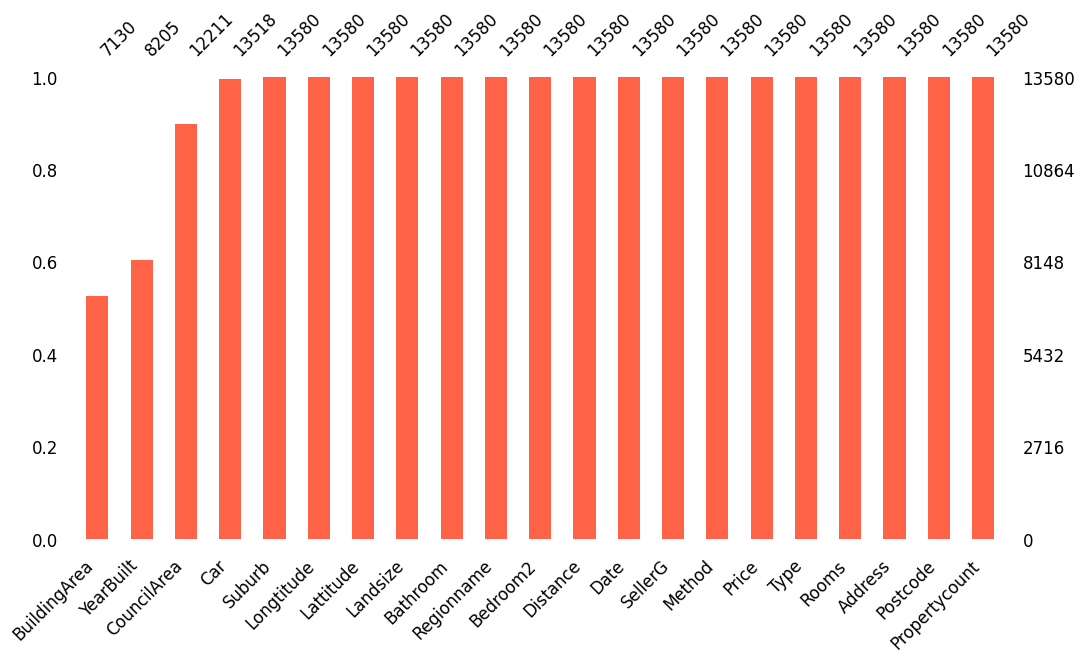

In [ ]:
import missingno as msno
msno.bar(melb_data,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato')

#color='steelblue')
#color="dodgerblue")
#color="tab:green")


Podemos ver que hay solo cuatro columnas que no tienen todos sus valores: "Car", "Building area", "Year build" y "Council area", aunque "Car" tiene muy pocos datos faltantes.

Tambien Podemos visualizar las posiciones en el dataset de los datos faltantes usando la matrix(). El gráfico aparece en blanco siempre que falten valores. Al ser 13580 casos, el gráfico esta muy comprimido,

<Axes: >

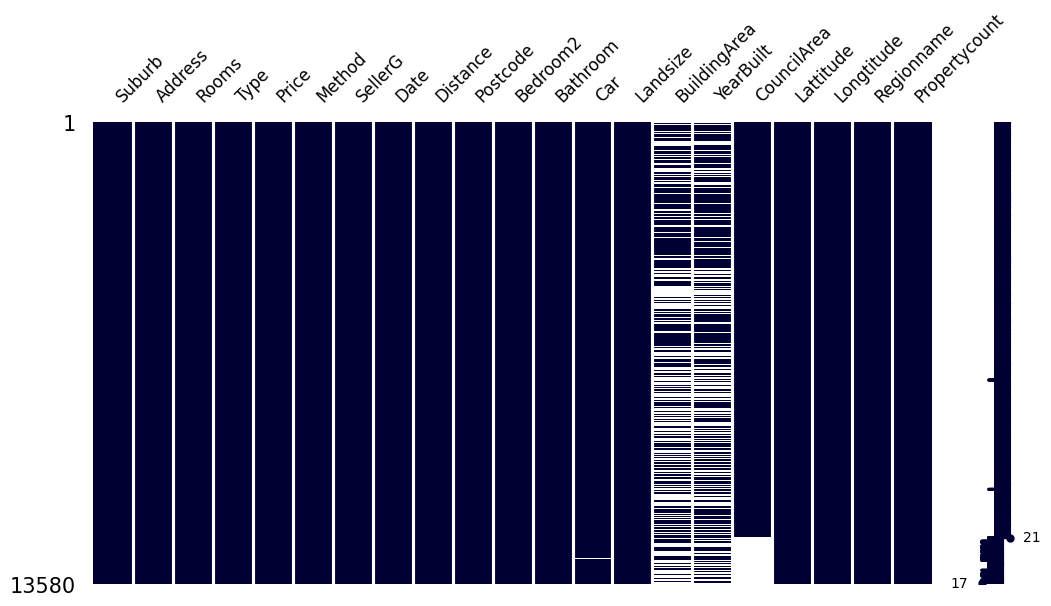

In [ ]:
msno.matrix(melb_data,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Si hago una muestra de 200 datos, se pueden pbservar las correlaciones entre los datos faltantes. Para poder accionar sobre el dataset sin incorporar nuevos errores, es necesario corroborar que el mecanismo de pérdida sea aleatorio.

<Axes: >

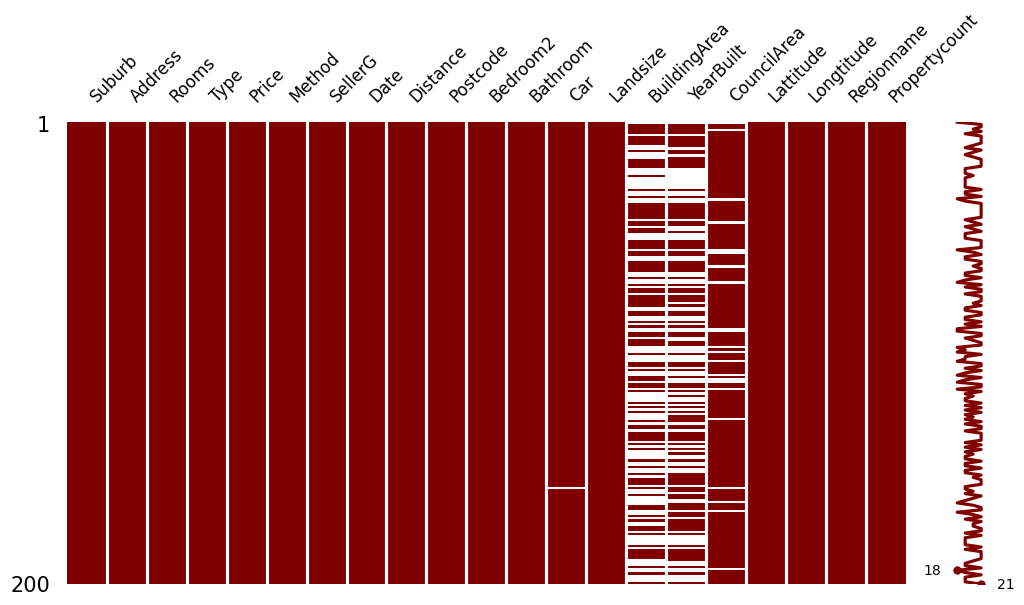

In [ ]:
msno.matrix(melb_data.sample(200),figsize=(12, 6), fontsize=12, color=[0.5,0,0])

### 1.8 Razones que contribuyen a tener datos faltantes

Antes de tratar los datos faltantes, es importante entender las razones de la pérdida de los datos. En general, se modela la pérdida en tres categorias

![Datos faltantes.](https://github.com/DiploDatos/AnalisisYCuracion/blob/master/Datos-faltantes3.png?raw=true)

<span style="color:Red"> 1. Missing Completely at Random (MCAR)</span>

Los valores faltantes de una variable dada (Y) no estan asociados con otras variables del dataset dado o con la misma variable (Y).

<span style="color:Red"> 2. Missing at Random (MAR)</span>

MAR ocurre la pérdida de los datos no es aleatoria, pero puede ser explicada completamente como funcion de otras variables con informacion completa.

<span style="color:Red"> 3. Missing Not at Random (MNAR)</span>

La pérdida depende de datos no observados o del valor perdido.





### 1.9 Detección de correlaciones

La existencia de correlacion entre la presencia ausencia de datos faltantes en determinadas variables es una muestra de la falta de aleatoriedad del mecanismo de perdida. Aun así, puede existir una relacion entre las variables que permita imputar el dato perdido como funcion de los datos relevados.

### 1.9.1 Detección de correlaciones usando matrix plot

En este caso, el dataset fue recolectado para predecir el precio de las propiedades en función de características de las propiedades y la localización geográfica. La variable Car tiene pocos datos faltantes, es razonable pensar que es un error de carga y no en la inexistencia del valor, pues cero en esta variable implica que la propiedad no tiene un espacio para parquear.


In [ ]:
Car = melb_data.Car

fig = px.histogram(Car, nbins=100, labels={'value': 'Car', 'count': 'number of houses'},
                   marginal='violin', title='Distribution of home with car places in Melbourne',
                   color_discrete_sequence=px.colors.sequential.RdBu)

#fig.update_layout(showlegend=False)

fig.show()

Es un poco raro que haya tantas casas sin parqueaderos, asi como es raro que haya casas con 10 parqueaderos.

In [ ]:
Car = melb_data.Car
Type = melb_data.Type
pd.crosstab(Type,Car)

Car,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00
Type,,,,,,,,,,,
h,846,2681,4524,702,499,63,54,7,9,1,3
t,15,492,584,19,4,0,0,0,0,0,0
u,165,2336,483,27,3,0,0,1,0,0,0


<Axes: >

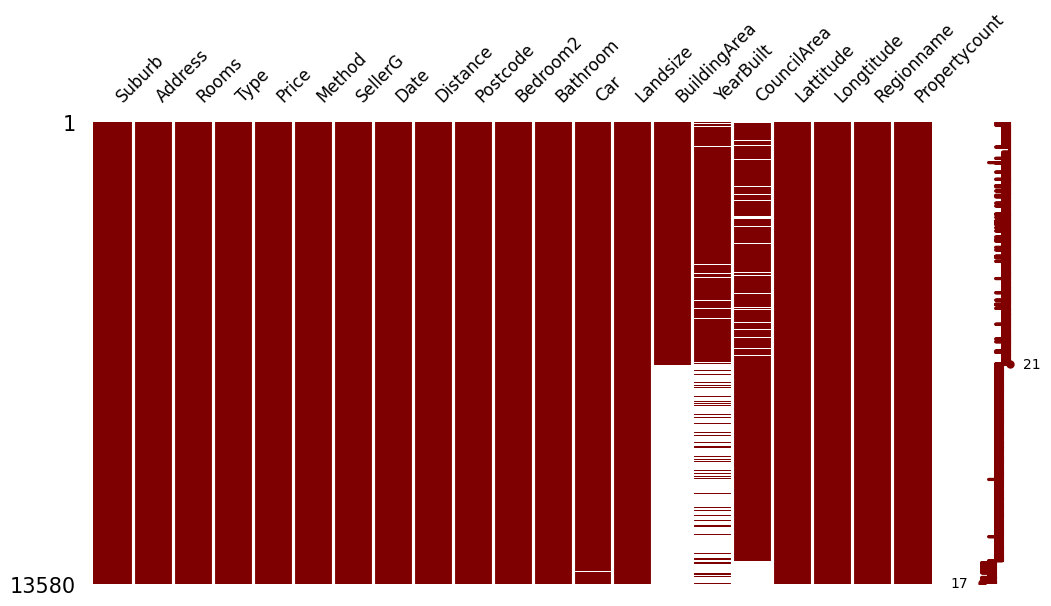

In [ ]:
sorted = melb_data.sort_values('BuildingArea')
msno.matrix(sorted,figsize=(12, 6), fontsize=12, color=[0.5,0,0])

### 1.9.2 Detección de correlaciones usando Heatmap

Abajo estamos mostrando un heatmap de correlaciones entrre las columnas que tienen datos faltantes.

La correlación toma valores entre -1 y 1.

-1 - Correlacion negativa exacta implica que si el valor de una variable está presente, en la otra esta ausente.

0 - Falta de correlacion implica que no se puede ver una relación lineal.

1 - Correlacion positva exacta implica que si una variable tiene valor, en la otra definitivamente va a tomar valor tambien.

<Axes: >

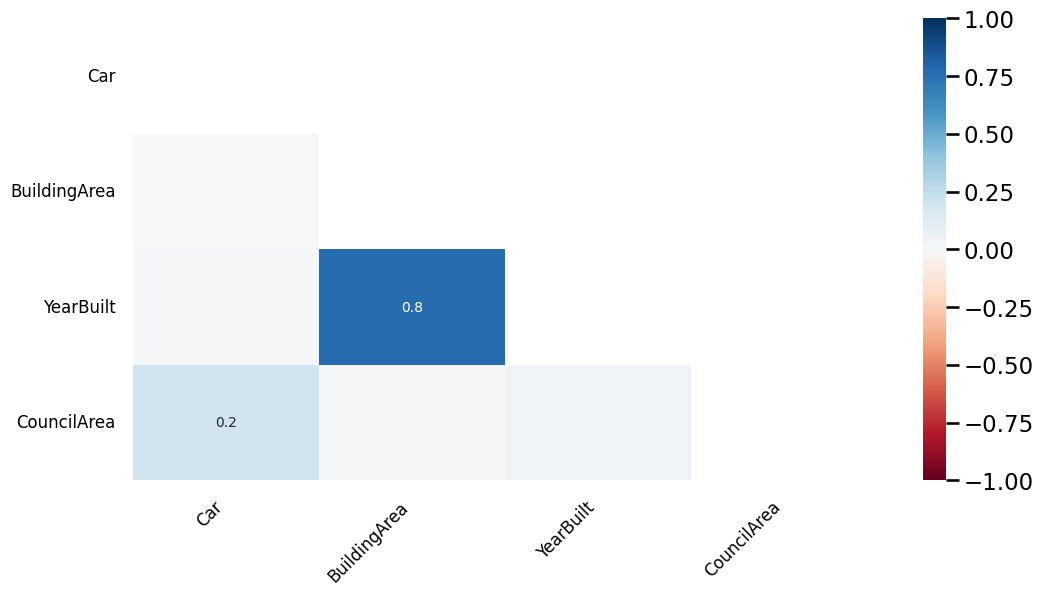

In [ ]:
msno.heatmap(melb_data,figsize=(12, 6), fontsize=12)

La aleatoriedad no es completa, pues hay alta correlacion entre YearBuilt y BuildingArea. Aun así, es posible utilizar imputacion estocástica controlando el nivel de error.

### 2. Tratamiento del valor faltante

![diagrama-datos-faltantes.png](https://github.com/DiploDatos/AnalisisYCuracion/blob/master/diagrama-datos-faltantes.png?raw=true)

### 2.1 Eliminacion de datos faltantes

Si la pérdida es completamente aleatoria, MCAR, las operaciones simples de Pandas que ignoran los NaN como el cálculo de medias y varianzas, no se ve afectado. Sin embargo, operaciones mas complejas pueden verse afectadas y se aconseja eliminar el caso completo.

### 2.1.1 Eliminación de **casos** completos

Si la pérdida es completamente aleatoria, MCAR, el porcentaje de casos con datos faltantes es pequeño, se elimina el caso completo.

In [ ]:
melb_df['Car'].mean() #pandas skips the missing values and calculates mean of the remaining values.

1.6100754549489569

In [ ]:
melb_df.dropna(subset=['Car'],how='any',inplace=True)
melb_df['Car'].isnull().sum()

0

<Axes: >

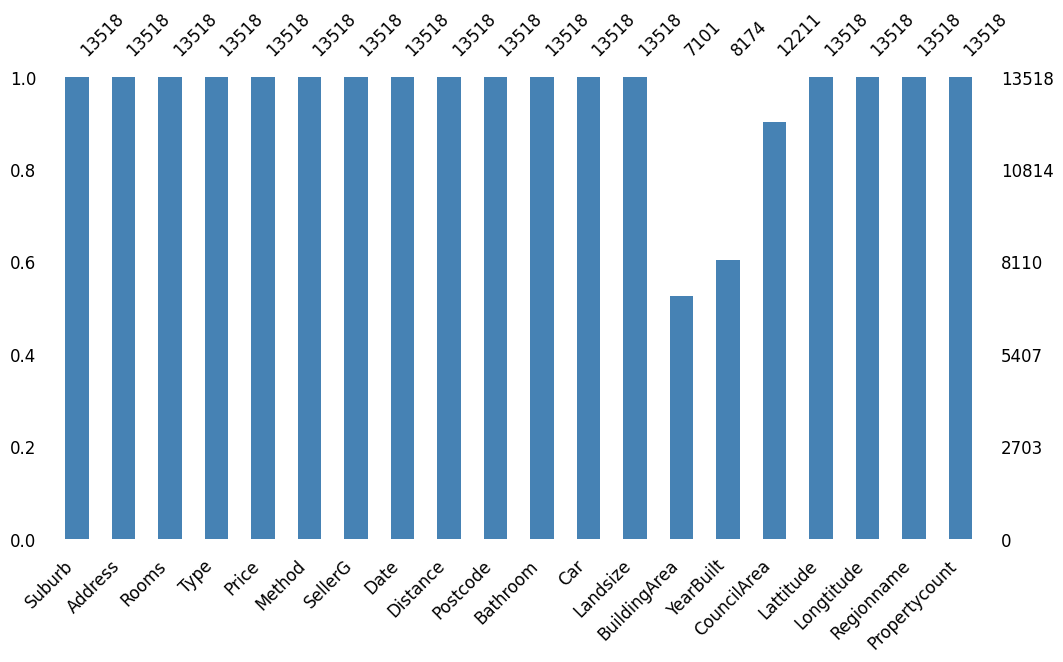

In [ ]:
msno.bar(melb_df,figsize=(12, 6), fontsize=12, color='steelblue')

### 2.1.2 Eliminación de variables

Si una columna contiene muchos valores faltantes, digamos más del 80%, y la característica no es significativa, es posible que se desee eliminar esa característica. Sin embargo, nuevamente, no es una buena metodología para eliminar datos.

**Eliminación de todas las columnas con datos faltantes**

In [ ]:
melb_data_without_missing_values = melb_data.dropna(axis=1)

<Axes: >

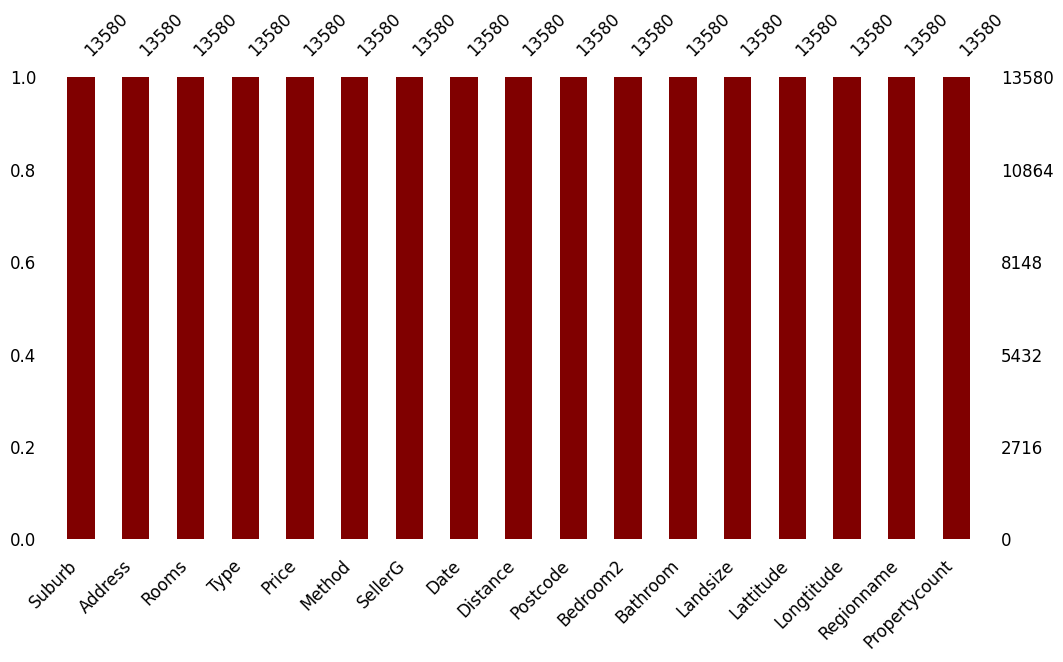

In [ ]:
msno.bar(melb_data_without_missing_values,figsize=(12, 6), fontsize=12, color=[0.5,0,0])

Si esas columnas tenían información útil (en los lugares que no faltaban), su modelo pierde acceso a esta información cuando se quita la columna. Además, si a los datos de la prueba les faltan valores en lugares donde los datos de entrenamiento sí los tienen, se producirá un error.

No suele ser la mejor solución, sin embargo, puede resultar útil cuando faltan la mayoría de los valores de una columna.



**Eliminación de alguna columna muy dañada, o no tan importante**

In [ ]:
melb_df=melb_df.drop('CouncilArea',axis=1)

<Axes: >

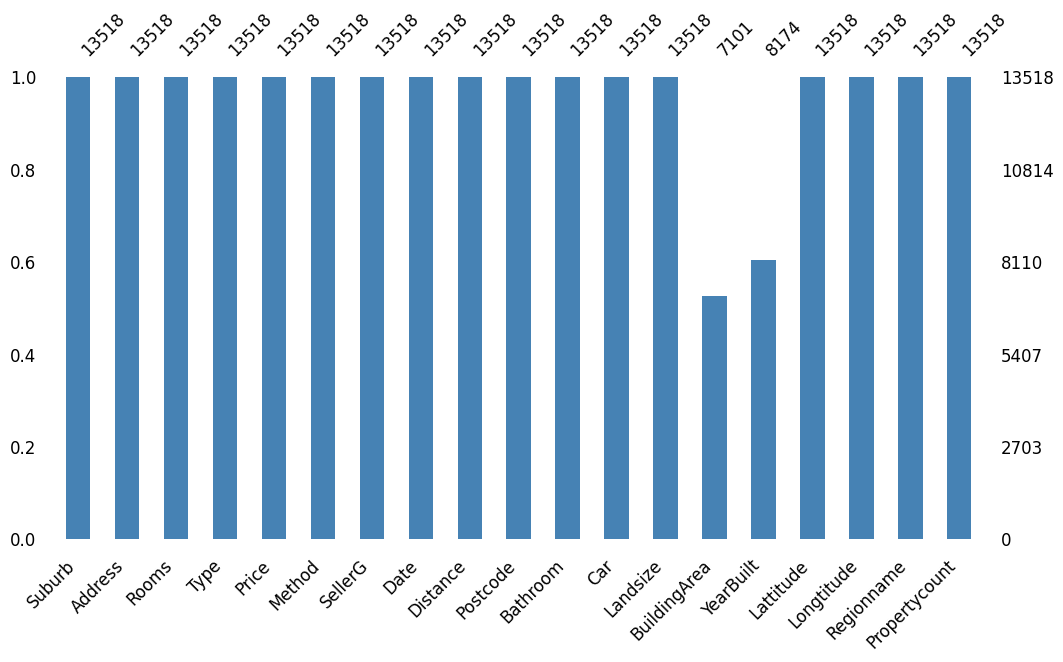

In [ ]:
msno.bar(melb_df,figsize=(12, 6), fontsize=12, color='steelblue')

### 2.2 Técnicas de imputación

Imputar refiere a reemplazar datos faltantes con valores sustitutos. Hay muchas formas de imputar los valores faltantes según la naturaleza del problema y los datos.  Segun los datos, hay técnicas para datos categóricos, datos continuos y series de tiempo. Dependiendo de la naturaleza del problema, las técnicas de imputación se pueden clasificar en general como técnicas básicas y avanzadas:

Técnicas básicas de imputación reemplazan el dato faltante por

- Un valor constante que tiene significado dentro del dominio, como 0, distinto de todos los demás valores.

- Un valor de otro registro seleccionado al azar.

- Un valor medio, mediano o de moda para la columna.

Técnicas avanzadas de imputación reemplazan el dato faltante por

- Un valor estimado por otro modelo predictivo.



### 2.2.1 Técnicas Básicas

- Imputar con una constante

- Imputar usando estadísticos básicos (media, mediana o moda (valor mas frecuente) de cada columna en la cual los datos faltantes estan ubicados.

Estas técnicas estan incluidas en muchos paquetes de manejo de datos faltantes, y porque son operaciones básicas de filas y columnas, tambien pueden ser realizadas por Pandas.

Veamos un ejemplo del paquete sklearn.

In [ ]:
# imputing with a constant

from sklearn.impute import SimpleImputer

melb_data_constant = melb_df.copy()

<Axes: >

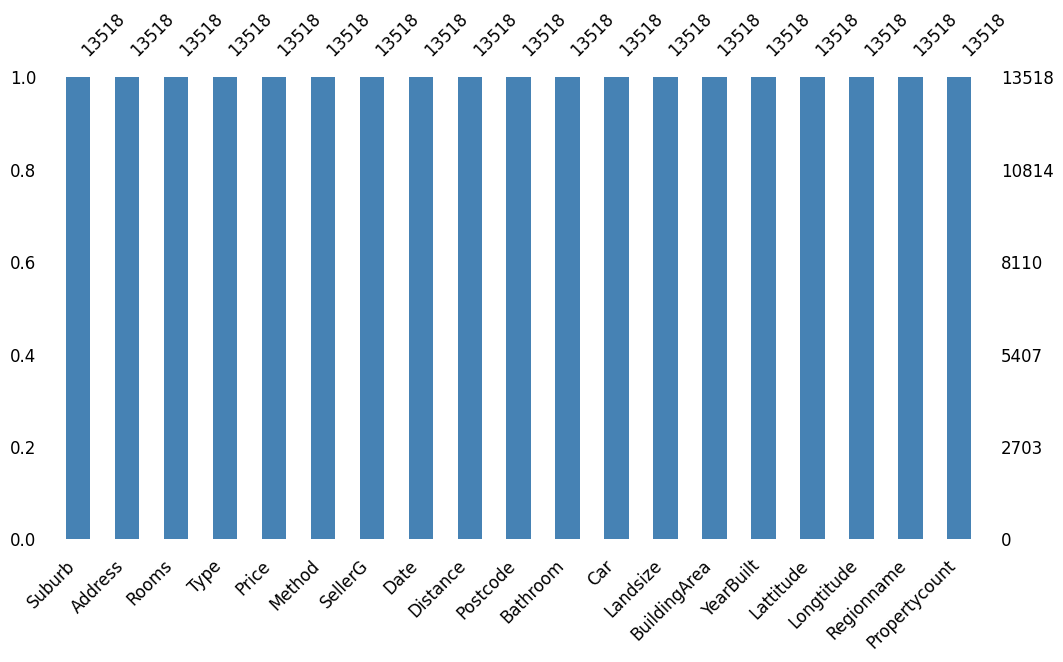

In [ ]:

#setting strategy to 'constant' y fill_value=0

mean_imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)

melb_data_constant.iloc[:,:] = mean_imputer.fit_transform(melb_data_constant)

msno.bar(melb_data_constant,figsize=(12, 6), fontsize=12, color='steelblue')



In [ ]:
melb_data_constant.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
4353,North Melbourne,6/55 Provost St,2,u,640000.00,S,MICM,8/10/2016,2.30,3051.00,2.00,1.00,0.00,84.00,2006.00,-37.80,144.95,Northern Metropolitan,6821.00
6770,Brunswick East,55 King St,4,h,1550000.00,S,Woodards,4/06/2016,4.50,3057.00,2.00,2.00,470.00,191.00,1940.00,-37.77,144.98,Northern Metropolitan,5533.00
9901,Greensborough,22 Yangoora Pl,4,h,925000.00,SP,Nelson,24/06/2017,16.10,3088.00,2.00,2.00,1070.00,190.00,1980.00,-37.70,145.13,Northern Metropolitan,8524.00
3292,Heidelberg West,290 Oriel Rd,3,h,652000.00,S,Barry,11/02/2017,9.40,3081.00,1.00,0.00,589.00,0.00,0.00,-37.74,145.04,Eastern Metropolitan,2674.00
2489,Fairfield,7 Rathmines St,3,h,1350000.00,PI,McGrath,3/12/2016,5.80,3078.00,1.00,2.00,309.00,110.00,2000.00,-37.78,145.02,Northern Metropolitan,2970.00
3108,Hampton East,2 Harry St,3,h,1195000.00,S,Ray,27/11/2016,14.50,3188.00,1.00,2.00,601.00,0.00,0.00,-37.94,145.03,Southern Metropolitan,2356.00
11008,Epping,5 Combe Ct,3,h,556000.00,S,hockingstuart,12/08/2017,19.60,3076.00,1.00,1.00,525.00,0.00,1980.00,-37.64,145.04,Northern Metropolitan,10926.00
6647,Yarraville,3 Cuming St,2,h,856000.00,S,Greg,4/06/2016,7.00,3013.00,1.00,1.00,261.00,100.00,1880.00,-37.82,144.89,Western Metropolitan,6543.00
3769,Maidstone,2/13 Radio St,2,t,600000.00,S,Jas,28/08/2016,9.20,3012.00,2.00,1.00,145.00,112.00,2012.00,-37.78,144.87,Western Metropolitan,3873.00
3916,Maribyrnong,3/41 Pridham St,2,u,425000.00,S,Trimson,7/11/2016,8.70,3032.00,1.00,1.00,170.00,0.00,0.00,-37.78,144.89,Western Metropolitan,4918.00


### Pros:

- Trabaja con variables categóricas **sin necesidad de usar encodings** agregando una categoria mas.

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede intruducir **SESGOS** en los datos.

- Tiene sentido cuando la categoria que quiero agregar tiene sentido.


### 2.2.2 Imputar con el valor mas frecuente

<Axes: >

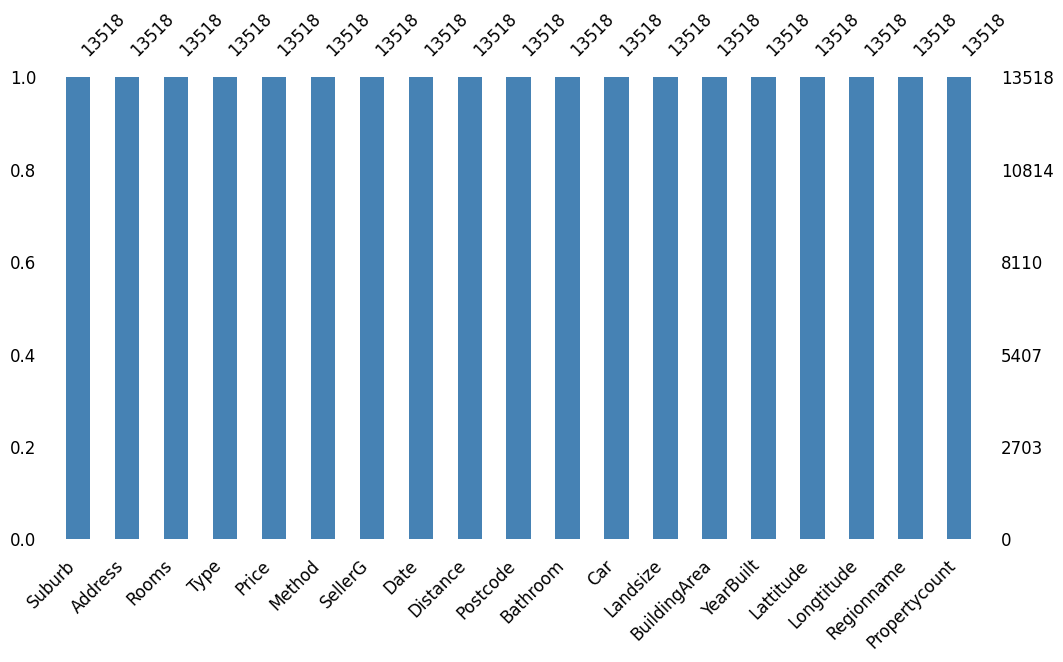

In [ ]:
# imputing with most_frequent

from sklearn.impute import SimpleImputer
melb_data_most_frequent = melb_df.copy()

#setting strategy to 'most_frequent'

mean_imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median or most_frequent

melb_data_most_frequent.iloc[:,:] = mean_imputer.fit_transform(melb_data_most_frequent)
msno.bar(melb_data_most_frequent,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
melb_data_most_frequent.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
8526,Yarraville,1/17 Gordon Pde,2,h,470000.00,S,Sweeney,8/04/2017,7.00,3013.00,1.00,1.00,79.00,120.00,1965.00,-37.82,144.88,Western Metropolitan,6543.00
5079,Reservoir,3/14 MacK St,3,t,592000.00,S,Ray,8/10/2016,11.20,3073.00,1.00,1.00,270.00,160.00,2016.00,-37.70,145.01,Northern Metropolitan,21650.00
9809,Brighton East,13 Churchill Ct,4,h,2525000.00,S,Buxton,24/06/2017,10.30,3187.00,2.00,2.00,725.00,300.00,2000.00,-37.93,145.02,Southern Metropolitan,6938.00
8085,Melbourne,1201/565 Flinders St,2,u,683000.00,S,MICM,22/04/2017,2.80,3000.00,2.00,1.00,1136.00,88.00,2009.00,-37.82,144.96,Northern Metropolitan,17496.00
7562,Brighton,38/568 New St,2,u,520000.00,PI,hockingstuart,13/05/2017,11.20,3186.00,1.00,1.00,1647.00,73.00,2004.00,-37.88,145.00,Southern Metropolitan,10579.00
12826,Reservoir,7 Loddon Av,3,h,935000.00,S,Ray,16/09/2017,12.00,3073.00,1.00,2.00,768.00,120.00,1970.00,-37.72,145.03,Northern Metropolitan,21650.00
10915,Blackburn South,17 Drummond St,3,h,1246000.00,SA,Fletchers,12/08/2017,13.40,3130.00,1.00,2.00,702.00,120.00,1970.00,-37.84,145.16,Eastern Metropolitan,4387.00
5612,South Yarra,19/110 Caroline St,2,u,780000.00,PI,Williams,8/10/2016,3.30,3141.00,1.00,1.00,0.00,75.00,1960.00,-37.83,144.99,Southern Metropolitan,14887.00
3844,Malvern East,12 Gauntlet Rd,3,t,940000.00,PI,Barry,8/10/2016,11.20,3145.00,2.00,1.00,206.00,120.00,1970.00,-37.88,145.09,Southern Metropolitan,8801.00
4921,Preston,33 Showers St,4,h,914000.00,S,Ray,10/12/2016,8.80,3072.00,1.00,1.00,339.00,120.00,1970.00,-37.75,145.00,Northern Metropolitan,14577.00


### Pros:

- Anda bien con variables categóricas **sin necesidad de usar encodings**

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede intruducir **SESGOS** en los datos.

### <span style="color:FireBrick">**2.2.3 Ejercicio: Dada las columnas del dataset que tienen datos faltantes,  imputar por la media. Decidir acciones**</span>

### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Solo trabaja a nivel de columna

- Dá resultados pobres en categoricas codificadas (No debe ser usado con variables categóricas)

- No es muy preciso, y no hay computo para el error.


### 2.2.3 Hot Deck:

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=13d31c29215bff603aed18b065b2806f7bb644d57c52cc65bf7b6c997e3bb634
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=822090a0c121bfbdb42e5dbbd69d1139bc17b985f7660a6771b417b41f2946da
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute  import IterativeImputer

# Crear un DataFrame de ejemplo
data_hotdeck=melb_df.copy()
data_hotdeck_numeric = data_hotdeck.select_dtypes(include='number')
# Imputar valores faltantes utilizando el método de Hot-Deck
imputer = IterativeImputer(imputation_order='ascending')
data_imputed = imputer.fit_transform(data_hotdeck_numeric)

print("DataFrame original:")
print(melb_df)
print("\nDataFrame con valores faltantes imputados utilizando Hot-Deck:")
print(data_hotdeck)


DataFrame original:
              Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h 1480000.00      S   
1         Abbotsford   25 Bloomburg St      2    h 1035000.00      S   
2         Abbotsford      5 Charles St      3    h 1465000.00     SP   
3         Abbotsford  40 Federation La      3    h  850000.00     PI   
4         Abbotsford       55a Park St      4    h 1600000.00     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h 1245000.00      S   
13576   Williamstown     77 Merrett Dr      3    h 1031000.00     SP   
13577   Williamstown       83 Power St      3    h 1170000.00      S   
13578   Williamstown      96 Verdon St      4    h 2500000.00     PI   
13579     Yarraville        6 Agnes St      4    h 1285000.00     SP   

        SellerG        Date  Distance  Postcode  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016      2.50  

### 2.3 Técnicas de imputacion avanzadas

Técnicas de imputación avanzadas usan algortimso de  aprendizaje automático para imputar los valores del dataset, a diferencia de los métodos anteriores que usan otros valores de la misma columna para imputar. Aqui vamos a ver dos métodos, y enumerar otros métodos basado en Random Forest:

- Nearest neighbors imputation

- Multivariate feature imputation

### 2.3.1 K-Nearest Neighbor Imputation

K-Nearest Neighbor es un algoritmo muy utilizado para una clasificación simple. El algoritmo utiliza "similitud de características" para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento. Esto es muy útil para hacer predicciones sobre  valores faltantes al encontrar los k-vecinos más cercanos a la observación con datos perdidos y luego imputarlos en función de los valores no perdidos en el vecindario.

Hay varias librerias que tienen este algoritmo

- <span style="color:FireBrick">**Fancyimpute**</span>

- <span style="color:FireBrick">**impyute**</span>

- <span style="color:FireBrick">**sklearn.impute**</span>

El siguiente codigo tiene un ejemplo del uso de la clase KNNImputer de Sklearn

In [ ]:
from sklearn.impute import KNNImputer

melb_data_knn = melb_df.copy(deep=True)


knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

melb_data_knn[['YearBuilt','BuildingArea']] = knn_imputer.fit_transform(melb_data_knn[['YearBuilt','BuildingArea']])


El parámetro **n_neighbors** especifica el número de vecinos más cercanos que se utilizarán para imputar el valor faltante. En este caso, se establece en 2, lo que significa que se considerarán los dos vecinos más cercanos para cada valor faltante.


El parámetro **weights** especifica cómo se ponderan los vecinos más cercanos al imputar el valor faltante. En este caso, se establece en "uniform", lo que significa que todos los vecinos contribuyen por igual al valor imputado. Otras opciones comunes son "distance", donde los vecinos más cercanos tienen un mayor peso en el cálculo del valor imputado, y las opciones personalizadas donde se pueden proporcionar pesos específicos para cada vecino.

En resumen, KNNImputer(n_neighbors=2, weights="uniform") crea un objeto KNNImputer que imputa valores faltantes utilizando el algoritmo de vecinos más cercanos, considerando los dos vecinos más cercanos y utilizando un peso uniforme para todos los vecinos. Este objeto se puede utilizar luego para imputar valores faltantes en un conjunto de datos dado.

<Axes: >

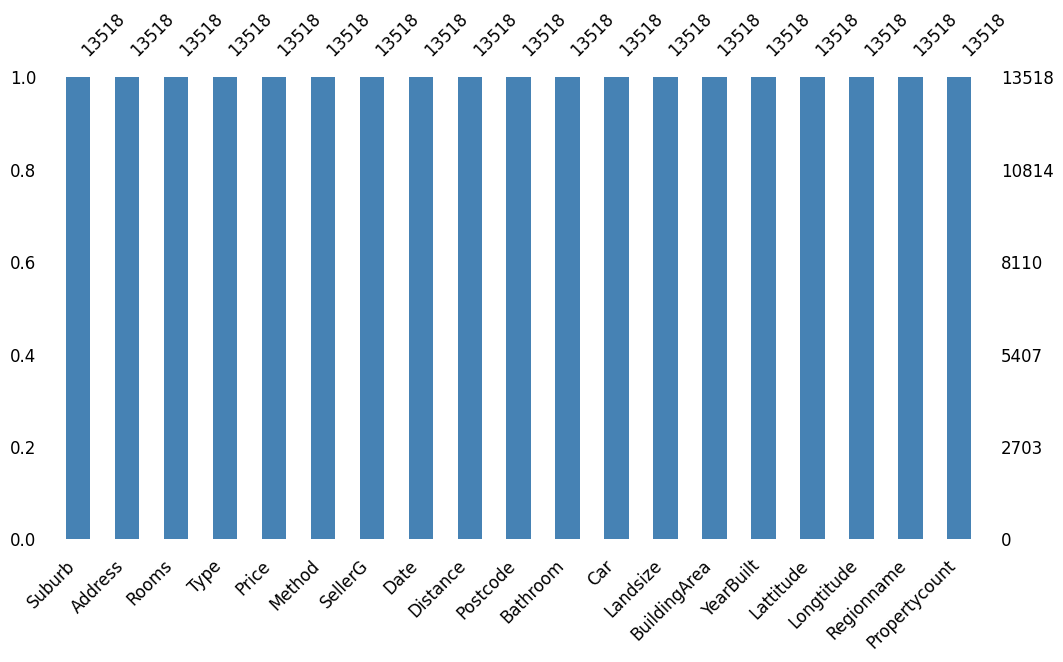

In [ ]:
msno.bar(melb_data_knn,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
melb_data_knn.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
11811,Sunbury,11 Gruner St,3,h,438000.00,S,YPA,22/07/2017,31.70,3429.00,1.00,4.00,606.00,96.00,1994.00,-37.58,144.71,Western Metropolitan,14092.00
2012,Coburg,9 Sargood St,2,h,642000.00,S,Nelson,27/06/2016,7.80,3058.00,1.00,0.00,167.00,152.13,1964.90,-37.75,144.96,Northern Metropolitan,11204.00
2875,Glenroy,15 Stanley St,3,h,980000.00,SP,Brad,4/03/2017,13.00,3046.00,2.00,3.00,1029.00,136.00,1950.00,-37.71,144.91,Northern Metropolitan,8870.00
9138,Epping,11 Grimwade Ct,3,h,540000.00,S,R&H,3/06/2017,19.60,3076.00,1.00,4.00,699.00,118.00,1988.00,-37.65,145.05,Northern Metropolitan,10926.00
4137,Moonee Ponds,1/263 Union Rd,3,t,1130000.00,S,Brad,27/11/2016,6.90,3039.00,2.00,2.00,217.00,145.00,2013.00,-37.77,144.92,Western Metropolitan,6232.00
6938,Fawkner,1/66 Lorne St,3,u,470000.00,SP,Brad,26/07/2016,12.40,3060.00,1.00,0.00,261.00,152.13,1964.90,-37.72,144.97,Northern Metropolitan,5070.00
10521,Sunshine,4 Farnsworth St,3,h,865000.00,S,Douglas,27/05/2017,10.50,3020.00,1.00,2.00,550.00,152.13,1964.90,-37.78,144.84,Western Metropolitan,3755.00
9387,Yallambie,8 MacAlister Bvd,5,h,1670000.00,S,Barry,3/06/2017,12.70,3085.00,3.00,2.00,617.00,315.00,2012.00,-37.72,145.10,Northern Metropolitan,1369.00
1160,Brighton,17 Rusden St,4,h,1500000.00,VB,Hodges,30/07/2016,11.20,3186.00,2.00,1.00,549.00,195.00,1990.00,-37.89,145.00,Southern Metropolitan,10579.00
8304,Reservoir,72 Henty St,4,h,1150000.00,S,Barry,13/05/2017,11.20,3073.00,1.00,2.00,928.00,152.13,1964.90,-37.72,144.99,Northern Metropolitan,21650.00


### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- Usa distancias calculadas usando los casos, aun cuando tengan NaN's, pero deben ser todas variables numericas.

- Antes de imputar, hay que codificar las variables, usando HotEncoding, LabelEncoding o OrdinalEncoding

- KNN Imputer precisa que los datos esten estandarizados. Datos con diferentes escalas introducen valores de reemplazo sesgados   Scikit-Learn’s MinMaxScaler escala las variables al [0,1].

- No es muy preciso, y no hay computo para el error.

- CouncilArea no puede ser imputada sin realizar encoding primero.

### 2.3.2 Multivariate feature imputation

Imputacion Multiple quiebra el problema de inferencia de los valores faltantes en tres pasos:

- imputación

- análisis

- agrupación

La imputación y el análisis puede realizarse  siguiendo el análisis estándar, pero la combinación debe realizarse siguiendo la regla de Rubin que da la fórmula para estimar la varianza total que se compone de la varianza dentro de la imputación y la varianza entre las diferentes imputaciones.

Imputación multiple por ecuaciones encadenadas (MICE) es una estrategia para imputar valores faltantes modelando cada característica con valores perdidos como una función de otras características en forma rotatoria. Realiza regresiones múltiples sobre una muestra aleatoria de los datos, luego toma el promedio de los valores de regresión múltiple y usa ese valor para imputar el valor faltante.

Este tipo de imputación funciona llenando los datos faltantes varias veces. Las imputaciones múltiples (IM) son mucho mejores que una sola imputación, ya que mide la incertidumbre de los valores perdidos de una mejor manera. El enfoque de ecuaciones encadenadas también es muy flexible y puede manejar diferentes variables de diferentes tipos de datos (es decir, continuos o binarios), así como complejidades como límites o patrones de omisión de encuestas.

La version de Sklearn no permite trabajar con variables de distinto tipo, hay que realizar encoding.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt','BuildingArea']])



melb_data_mice.sample(10)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
8089,Mont Albert,1/389 Mont Albert Rd,2,u,442500.00,SP,Ham,20/05/2017,11.80,3127.00,1.00,1.00,0.00,115.34,1960.00,-37.82,145.11,Eastern Metropolitan,2079.00
10368,Kew,6/62 Walpole St,2,u,682000.00,S,Nelson,27/05/2017,5.40,3101.00,1.00,1.00,0.00,80.00,1959.14,-37.80,145.03,Southern Metropolitan,10331.00
1842,Caulfield South,8 Lygon St,4,h,1774500.00,S,hockingstuart,14/05/2016,9.30,3162.00,2.00,2.00,575.00,256.00,2008.00,-37.90,145.03,Southern Metropolitan,5051.00
640,Balwyn North,42 Maud St,3,h,1480000.00,PI,Jellis,15/10/2016,9.20,3104.00,1.00,4.00,605.00,116.00,1950.00,-37.80,145.07,Southern Metropolitan,7809.00
6692,Yarraville,2/382 Williamstown Rd,2,h,630000.00,S,Jas,19/11/2016,7.00,3013.00,2.00,2.00,168.00,121.00,2000.00,-37.82,144.88,Western Metropolitan,6543.00
11032,Gisborne,42 Kilmore Rd,3,h,775000.00,S,Raine,12/08/2017,45.90,3437.00,2.00,4.00,1290.00,231.00,1988.00,-37.48,144.60,Northern Victoria,3376.00
11274,Ascot Vale,1/129 The Parade,2,u,566000.00,S,Nelson,15/07/2017,4.30,3032.00,1.00,1.00,1017.00,200.36,1972.00,-37.77,144.91,Western Metropolitan,6567.00
504,Balaclava,15/36 Brighton Rd,1,u,500000.00,SP,Biggin,27/11/2016,6.60,3183.00,1.00,0.00,0.00,154.39,1965.51,-37.87,144.99,Southern Metropolitan,2952.00
12559,Mill Park,34 Border Dr,3,h,710000.00,S,Love,9/09/2017,17.90,3082.00,2.00,2.00,585.00,154.39,1965.51,-37.65,145.06,Northern Metropolitan,10529.00
4850,Prahran,47 Clifton St,2,h,815000.00,S,Beller,19/11/2016,4.50,3181.00,1.00,0.00,96.00,71.00,1880.00,-37.85,145.00,Southern Metropolitan,7717.00


### Pros:

- Versatil, puede utilizarse con diferentes clases de clasificadores

### Cons

- La version de Sklearn no admite datos mixtos, debe realizarse un encoding primero.

### <span style="color:FireBrick">**2.2.3 Ejercicio: Dada las columnas del dataset que tienen datos faltantes,  imputar con los siguientes estimadores**</span>
- BayesianRidge(),
- DecisionTreeRegressor(max_features='sqrt', random_state=0),
- ExtraTreesRegressor(n_estimators=10, random_state=0),
- KNeighborsRegressor(n_neighbors=15)

LinearRegression: Un modelo de regresión lineal ordinaria.
RandomForestRegressor: Un modelo de regresión de bosque aleatorio.
DecisionTreeRegressor: Un modelo de regresión de árbol de decisión.
KNeighborsRegressor: Un modelo de regresión de vecinos más cercanos.

### <span style="color:FireBrick">**Decidir acciones**</span>


### 2.3.4 Otros métodos de imputación


- **miceforest: Fast Imputation with Random Forests in Python**

Fast, memory efficient Multiple Imputation by Chained Equations (MICE) with random forests. It can impute categorical and numeric data without much setup, and has an array of diagnostic plots available.

https://github.com/AnotherSamWilson/miceforest#Using-miceforest

https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b

- **MissForest missingpy library**

MissForest imputes missing values using Random Forests in an iterative fashion [1]. By default, the imputer begins imputing missing values of the column (which is expected to be a variable) with the smallest number of missing values -- let's call this the candidate column. The first step involves filling any missing values of the remaining, non-candidate, columns with an initial guess, which is the column mean for columns representing numerical variables and the column mode for columns representing categorical variables.

https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3


- **Datawig Imputation Using Deep Learning**

Este método funciona muy bien con características categóricas y no numéricas. Es una biblioteca que aprende modelos de aprendizaje automático utilizando redes neuronales profundas para imputar valores faltantes en un marco de datos. También es compatible con CPU y GPU para entrenamiento.

- **Stochastic regression imputation**

Es bastante similar a la imputación por regresión, que intenta predecir los valores perdidos haciendo una regresión de otras variables relacionadas en el mismo conjunto de datos, más algún valor residual aleatorio.

- **Extrapolation and Interpolation**

Intenta estimar valores de otras observaciones dentro del rango de un conjunto discreto de puntos de datos conocidos.

- **Hot-Deck imputation**

Funciona eligiendo aleatoriamente el valor faltante de un conjunto de variables relacionadas y similares.


### Conclusion

 No existe una forma perfecta de compensar los valores perdidos en un conjunto de datos. Cada estrategia puede funcionar mejor para ciertos conjuntos de datos y tipos de datos faltantes, pero puede funcionar mucho peor en otros tipos de conjuntos de datos. Hay algunas reglas establecidas para decidir qué estrategia usar para tipos particulares de valores perdidos, pero más allá de eso, debe experimentar y verificar qué modelo funciona mejor para su conjunto de datos.